In [1]:
import os 
import sys 

# path to python main folder in this project
libraries = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) 
sys.path.append(libraries) 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from decompose import greedyDecomposition, calibration

In [2]:
PATH = os.path.abspath(os.path.join(os.getcwd(), (os.pardir+'/')*3)) # main path
PATH

'/Users/javigamero/MyMac/DS_Master/TFM'

In [3]:
t_path = os.path.join(PATH, 'data_preproc/LightSignal_t.csv')
t_id = pd.read_csv(t_path, sep=';', header=None) # t[0] is nonsensen, remove it
t_id.set_index(0, inplace=True)

t_id = np.array(t_id).reshape(-1).astype(np.int32)
print(t_id.shape)

(1000,)


# VIS

In [4]:
t0 = 150 # (ns), moment to start considering the slow component, EXPERIMENTAL
t_idx = np.where(t_id>t0)[0]
t_idx.shape

t1 = 500 # (ns), moment to start considering the slow component, EXPERIMENTAL
t_idx1 = np.where(t_id>t1)[0]
t_idx1.shape

(950,)

In [5]:
id_path = os.path.join(PATH, 'data_preproc/LightSignal_VIS.csv')
signals_id = pd.read_csv(id_path, header=0, index_col=0)

signals_id=signals_id.iloc[:,:]
print('Ideal signals df shape: ', signals_id.shape)

Ideal signals df shape:  (20000, 1000)


In [6]:
signals_id.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0_1,0,0,0,204,604,538,348,241,151,106,...,0,0,1,0,0,0,0,0,0,0
0_2,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
0_3,0,0,0,0,6,12,21,16,10,7,...,0,0,0,0,0,0,0,0,0,0
0_4,0,0,1,174,623,550,338,219,149,117,...,0,0,0,0,0,0,0,0,0,0
0_5,0,0,0,14,125,182,166,111,89,74,...,0,0,0,0,1,0,0,0,0,0


In [7]:
data_path = os.path.join(os.path.join(PATH, 'data_preproc'), 'DeconvolvedSignal_us.csv')
signals_dec_us = pd.read_csv(data_path, sep=';', header=None, index_col=0)

print(signals_dec_us.shape)
signals_dec_us.head()

(9325, 1000)


,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,,,,,,,,,,,,,,,,,,,,,
0_1,-0.013636,0.003455,5.652545,28.486182,44.607818,35.096364,21.015091,11.813455,7.580909,6.095455,...,-0.016545,-0.031273,-0.032909,-0.032000,-0.023455,-0.021091,-0.014000,-0.017818,-0.018545,-0.02250
0_4,0.000182,0.000727,1.786182,12.082909,23.939818,23.189455,14.626545,8.413455,5.297636,3.896545,...,0.001455,0.001273,0.002000,0.000182,-0.000909,-0.002182,-0.005818,-0.005273,-0.003818,-0.00250
0_6,0.004182,-0.002182,4.107455,18.174182,28.416909,23.247273,13.882909,7.938727,4.708000,3.035455,...,0.005455,0.005273,0.007091,0.008364,0.009091,0.010182,0.008909,0.006364,0.009455,0.00475
0_8,-0.008000,0.303091,5.657455,16.356182,20.395273,15.051636,8.831818,5.433091,3.595455,2.263455,...,-0.006182,-0.004909,-0.011818,-0.012000,-0.010727,-0.006727,-0.008727,-0.009818,-0.005818,-0.00800
0_9,0.007636,0.073455,3.116182,15.448909,23.388909,18.269273,11.052000,6.872364,4.603273,2.915636,...,0.000909,0.001091,0.001091,0.005091,0.006909,0.008727,0.006545,0.001273,0.006182,0.00525


In [8]:
signals_id=signals_id.loc[signals_dec_us.index,:]
signals_id.shape

(9325, 1000)

In [9]:
dE_path = os.path.join(PATH, 'data_preproc/dE.csv')
dE = pd.read_csv(dE_path, sep=';', header=0, index_col=0)
dE = dE.loc[signals_id.index]

In [10]:
dE.head()

,dE
0,
0_1,48.297063
0_4,39.765737
0_6,43.809366
0_8,50.682234
0_9,52.356169


/Users/javigamero/MyMac/DS_Master/TFM/scripts/python/decompose.py:279: RuntimeWarning: divide by zero encountered in divide
  self.C_distribution = r_dec/r_id # calibration factor


Calibration factor distribution returned


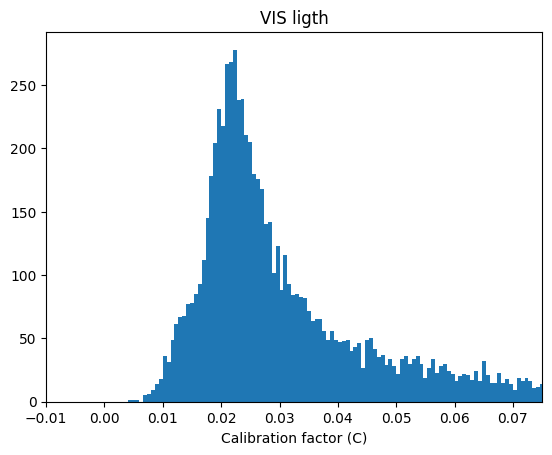

In [11]:
cal = calibration(signal_dec=signals_dec_us, 
                  signal_id=signals_id,
                  t=t_id)

C = cal._calculate_CalibrationFactor(return_dist=True)
# C = C[C<0.2]
# C = 1/C
data = pd.DataFrame({'Calibration Factor': C})

# sns.histplot(data=data)
plt.hist(C, range=[0,0.1], bins=150)
plt.xlim(-0.01,0.075)
# plt.xlim(0,100)
plt.xlabel('Calibration factor (C)')
plt.title('VIS ligth')
plt.show()

In [12]:
cal = calibration(signal_dec=signals_dec_us, 
                  signal_id=signals_id,
                  t=t_id)

C = cal._calculate_CalibrationFactor(return_C=True)
# C = C[C<0.2]
# C = 1/C
print('Final calibration factor, C: ', C)

Calibration factor returned
Final calibration factor, C:  0.022000000000000002


# VUV

In [13]:
id_path = os.path.join(PATH, 'data_preproc/LightSignal_VUV.csv')
signals_id_VUV = pd.read_csv(id_path, header=0, index_col=0)

signals_id=signals_id.loc[signals_dec_us.index,:]
print('Ideal signals df shape: ', signals_id.shape)

Ideal signals df shape:  (9325, 1000)


Calibration factor distribution returned


/Users/javigamero/MyMac/DS_Master/TFM/scripts/python/decompose.py:279: RuntimeWarning: divide by zero encountered in divide
  self.C_distribution = r_dec/r_id # calibration factor


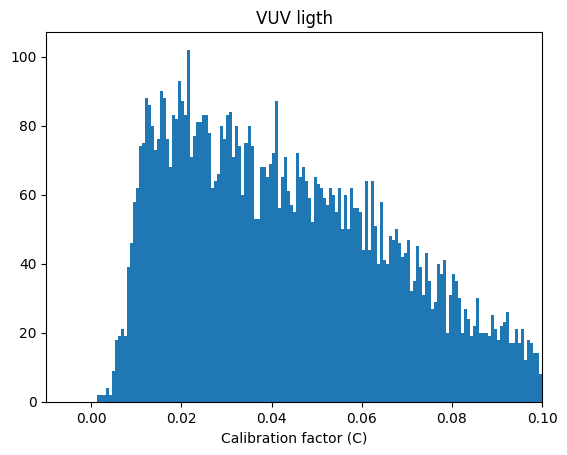

In [14]:
cal = calibration(signal_dec=signals_dec_us, 
                  signal_id=signals_id_VUV,
                  t=t_id)

C = cal._calculate_CalibrationFactor(return_dist=True)
# C = C[C<0.2]
# C = 1/C
data = pd.DataFrame({'Calibration Factor': C})

plt.hist(C, range=[0,0.1], bins=150)
plt.xlim(-0.01,0.1)
# plt.xlim(0,100)
plt.xlabel('Calibration factor (C)')
plt.title('VUV ligth')
plt.show()

# VIS + VUV

In [15]:
signals_id = signals_id+signals_id_VUV

Calibration factor distribution returned


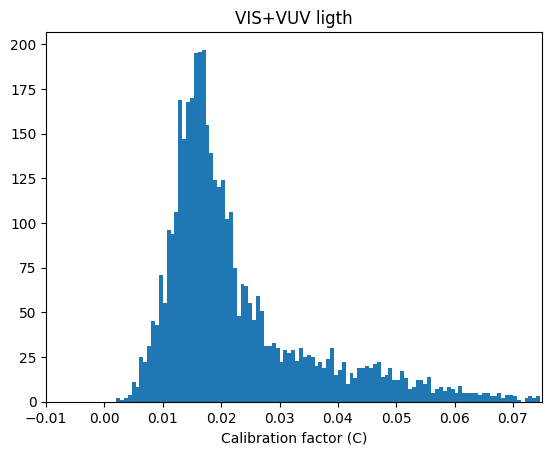

In [19]:
cal = calibration(signal_dec=signals_dec_us, 
                  signal_id=signals_id,
                  t=t_id)

C = cal._calculate_CalibrationFactor(return_dist=True)
# C = C[C<0.2]
# C = 1/C
data = pd.DataFrame({'Calibration Factor': C})

# sns.histplot(data=data)
plt.hist(C, range=[0,0.1], bins=150)
plt.xlim(-0.01,0.075)
# plt.xlim(0,100)
plt.xlabel('Calibration factor (C)')
plt.title('VIS+VUV ligth')
plt.show()

In [18]:
cal = calibration(signal_dec=signals_dec_us, 
                  signal_id=signals_id,
                  t=t_id)

C = cal._calculate_CalibrationFactor(return_C=True)
# C = C[C<0.2]
# C = 1/C
print('Final calibration factor, C: ', C)

Calibration factor returned
Final calibration factor, C:  0.01666666666666667
